1. In the above dataset,

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [82]:
customer_acqusition = pd.read_csv("C:/Users/dharmendra.sing1/Python_Foundation_Case_Study_2-Credit_Card_Case_Study/Customer Acqusition.csv")

In [83]:
repayment = pd.read_csv("C:/Users/dharmendra.sing1/Python_Foundation_Case_Study_2-Credit_Card_Case_Study/Repayment.csv")

In [84]:
repayment=repayment.rename(columns={'Month':"repayment_Month"})

In [85]:
spend = pd.read_csv("C:/Users/dharmendra.sing1/Python_Foundation_Case_Study_2-Credit_Card_Case_Study/spend.csv")

In [86]:
spend=spend.rename(columns={'Month':"spend_Month"})


In [87]:
Credit_Card_Data = pd.read_excel("C:/Users/dharmendra.sing1/Python_Foundation_Case_Study_2-Credit_Card_Case_Study/Credit Card Data.xlsx")

# a. In case age is less than 18, replace it with mean of age values.

In [88]:
customer_acqusition.loc[(customer_acqusition.Age<18),'Age']=customer_acqusition.Age.mean()

# b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
(customer’s limit provided in acquisition table is the per transaction limit on his card)


In [89]:
#creation of the new data base with the help of costumer Aqusition  and spend:- 
customer_spend = spend.merge(customer_acqusition,left_on='Customer',right_on='Customer',how='inner' )
#spend amount replaced with 50% of that customer’s limit, if ,spend amount is more than the limit
customer_spend['Amount']=np.where(customer_spend.Amount>customer_spend.Limit,customer_spend.Limit/2,customer_spend.Amount)
#print dataset
customer_spend

,Sl No:,Customer,spend_Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,3-Jan-04,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,15-Jan-04,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4,A1,25-Jan-04,FOOD,484342.47,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5,A1,17-Jan-05,CAMERA,369694.07,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,277,A7,3-May-06,AIR TICKET,50000.50,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,295,A7,23-Feb-05,CAMERA,50000.50,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,313,A7,12-Jan-04,AUTO,50000.50,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,331,A7,25-Jan-04,TRAIN TICKET,50000.50,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


# c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [90]:
##creation of the new data base with the help of costumer Aqusition  and repayment

customer_repayment = repayment.merge(customer_acqusition,left_on='Customer',right_on='Customer',how='inner' )
# replacing the repayment amount with the limit if repayment amount is more than the limit.
customer_repayment['Amount']=np.where(customer_repayment.Amount>customer_repayment.Limit,customer_repayment.Limit,customer_repayment.Amount)
#print updated dataset
customer_repayment


,SL No:,Customer,repayment_Month,Amount,Unnamed: 4,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,12-Jan-04,495414.75,NaN,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,3-Jan-04,245899.02,NaN,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,3.0,A1,15-Jan-04,259490.06,NaN,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,4.0,A1,25-Jan-04,437555.12,NaN,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,5.0,A1,17-Jan-05,165972.88,NaN,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,277.0,A7,22-Nov-05,55108.71,NaN,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,295.0,A7,3-Dec-05,100001.00,NaN,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,313.0,A7,23-Feb-05,100001.00,NaN,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,331.0,A7,31-Mar-06,100001.00,NaN,7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


# 2. From the above dataset create the following summaries:
 a. How many distinct customers exist?

In [91]:
len(customer_acqusition.Customer.unique())


100

b. How many distinct categories exist?

In [92]:
len(customer_acqusition.Product.unique())

3

In [93]:
customer_acqusition['Product'].drop_duplicates()

0        Gold
1      Silver
2    Platimum
Name: Product, dtype: object

 c. What is the average monthly spend by customers?

In [94]:
customer_spend.pivot_table(index=pd.to_datetime(customer_spend['spend_Month']).dt.strftime('%Y / %m'),
                           values='Amount',aggfunc='mean').reset_index()

,spend_Month,Amount
0,2004 / 01,144233.915179
1,2004 / 02,136998.280000
2,2004 / 03,133708.090714
3,2004 / 04,124621.976429
4,2004 / 05,153326.954286
5,2004 / 09,171579.263571
6,2004 / 11,79642.078571
7,2005 / 01,192271.670714
8,2005 / 02,154334.423869
9,2005 / 04,146430.918929


 d. What is the average monthly repayment by customers?

In [95]:
customer_repayment.pivot_table(index=pd.to_datetime(customer_repayment['repayment_Month']).dt.strftime('%Y / %m'),
                               values='Amount',aggfunc='mean').reset_index()

,repayment_Month,Amount
0,2004 / 01,159971.502571
1,2004 / 02,125612.505556
2,2004 / 03,177767.948000
3,2004 / 04,175632.658000
4,2004 / 05,151310.396400
5,2004 / 09,118926.025625
6,2004 / 11,119226.575333
7,2005 / 01,181260.750000
8,2005 / 02,157356.791358
9,2005 / 04,121163.452000


 e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
 (Profit is defined as interest earned on Monthly Profit.
 Monthly Profit = Monthly repayment– Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [96]:
#sum of the monthly repayment has been calculated:- month/date format has been changed to generate the pivot table monthwise:-
Monthly_repayment = customer_repayment.pivot_table(
    index=pd.to_datetime(customer_repayment['repayment_Month']).dt.strftime('%Y / %m'),
    values='Amount',aggfunc='sum').reset_index()

#sum of the monthly spend has been calculated:- month/date format has been changed to generate the pivot table monthwise:-
Monthly_spend = customer_spend.pivot_table(
    index=pd.to_datetime(customer_spend['spend_Month']).dt.strftime('%Y / %m'),
    values='Amount',aggfunc='sum').reset_index()

#monthly prfit calculation:- 
#merge the monthly_spend and monthly_payment
Monthly_profit =Monthly_repayment.merge(Monthly_spend,left_on='repayment_Month',right_on='spend_Month',how='inner' )
#rename the column L :- amount.x and amount.y 
Monthly_profit=Monthly_profit.rename(columns={'Amount_x':"repayment_amount",'Amount_y':'spend_amount'})
# new column generation to calculate monthly payment in the dateframe 
Monthly_profit['monthly_profit']=Monthly_profit.repayment_amount-Monthly_profit.spend_amount
#removing the negative values:-
Monthly_profit.drop(Monthly_profit[Monthly_profit.monthly_profit<0].index,inplace=True)
#Monthly profit generated by the bank over the 2.9% intrest:-
Monthly_profit['monthly_bank_profit']=Monthly_profit.monthly_profit*2.9/100
#...
Monthly_profit.loc[:,['spend_Month','monthly_bank_profit']].rename(columns={'spend_Month':'Months'})

,Months,monthly_bank_profit
0,2004 / 01,14854.05404
2,2004 / 03,23043.57255
3,2004 / 04,51607.36760
4,2004 / 05,47449.29395
6,2004 / 11,19528.87637
10,2005 / 05,265963.41583
12,2005 / 07,3134.77994
13,2005 / 08,45866.50701
15,2005 / 10,10930.31228
17,2005 / 12,28060.53369


f. What are the top 5 product types?


In [97]:
spend.pivot_table(index='Type',values='Amount',aggfunc='sum').reset_index().sort_values(by=['Amount'],ascending=False).head(5)

,Type,Amount
10,PETRO,49863174.09
4,CAMERA,41481571.96
7,FOOD,37773338.43
14,TRAIN TICKET,33067077.15
0,AIR TICKET,32955445.42


 g. Which city is having maximum spend?


In [98]:
customer_spend.pivot_table(index='City',values='Amount',
                           aggfunc='sum').reset_index().sort_values(by=['Amount'],ascending=False).head(1)

,City,Amount
4,COCHIN,45963513.5


 h. Which age group is spending more money?


In [99]:
customer_spend.pivot_table(index='Age',values='Amount',
                           aggfunc='sum').reset_index().sort_values(by=['Amount'],ascending=False).head(1)

,Age,Amount
6,28.0,17365270.23


i. Who are the top 10 customers in terms of repayment?


In [100]:
repayment.pivot_table(index='Customer',values='Amount',
                           aggfunc='sum').reset_index().sort_values(by=['Amount'],ascending=False).head(10)

,Customer,Amount
58,A61,10539142.91
57,A60,9876290.74
5,A13,9572000.66
15,A22,9372561.68
14,A21,9056336.15
38,A43,8489871.46
40,A45,8448334.87
4,A12,8334760.16
43,A48,8292416.75
6,A14,7943268.63


3. Calculate the city wise spend on each product on yearly basis. Also include a graphical 
representation for the same.


spend_Month        2004                                 2005              \
Product            Gold    Platimum      Silver         Gold    Platimum   
City                                                                       
BANGALORE    9289878.54  1112732.30  1291852.58  12892362.99   912284.97   
BOMBAY       6987853.53   897264.94   532089.03   8983018.28   711804.94   
CALCUTTA     7477140.98  2037690.30   500006.00  10303355.80  4434696.31   
CHENNAI      1059618.50  3535652.38   282056.86   3740945.58  5053956.32   
COCHIN       7315850.15  3419904.07   814229.62  12110613.03  4960921.71   
DELHI        2806495.00   283512.89   768172.30   1964845.27   494157.86   
PATNA        2072567.90  1113069.60   756684.10   3252615.77  2883231.07   
TRIVANDRUM   2415102.84  2161676.67   209667.48   1240375.85  3601443.30   

spend_Month                    2006                          
Product         Silver         Gold    Platimum      Silver  
City                                                         
BANGALORE    830612.34  12030611.09   685831.27  1415480.94  
BOMBAY       508988.54   7917144.31   972130.01  1092833.80  
CALCUTTA     440147.06  11167532.77  3589606.66  1157956.42  
CHENNAI      377184.49   2704288.62  5024923.40   350009.50  
COCHIN       652269.38  10499142.38  4920592.29  1269990.87  
DELHI        612311.21   2957103.32   176788.72   854899.97  
PATNA        950094.19   2276181.69  1256137.65   700005.00  
TRIVANDRUM   269912.99   2735710.87  2147403.75   555862.12

Text(0.5, 1.0, 'city wise spend on each product on yearly basis')

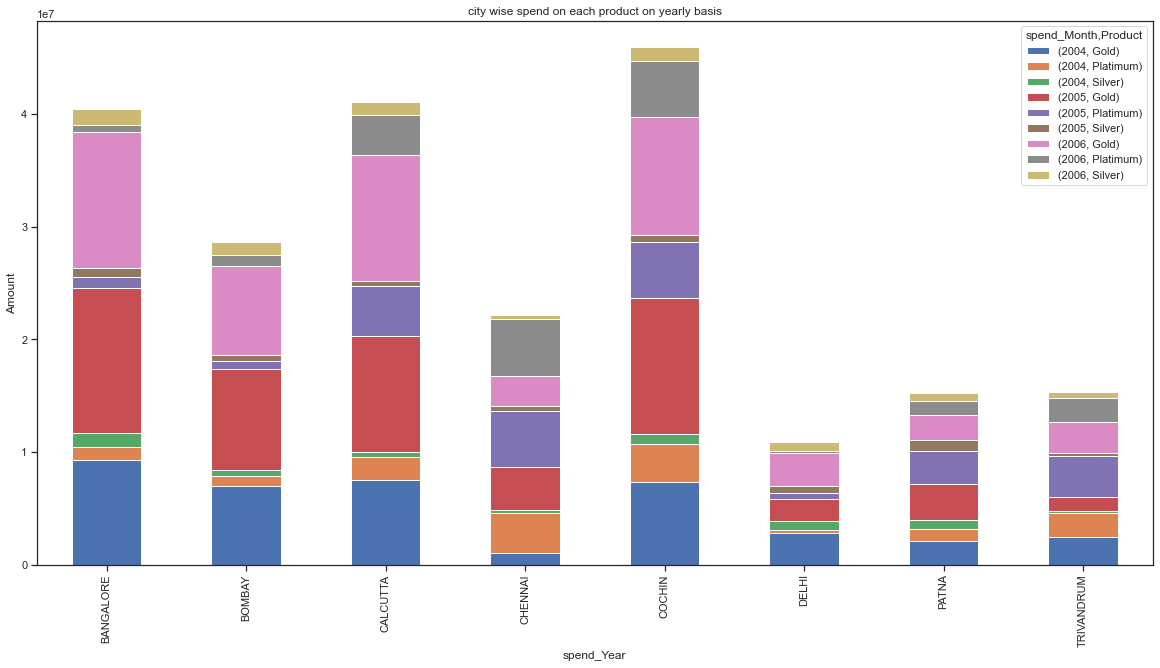

In [101]:
out1=customer_spend.pivot_table(columns=[pd.to_datetime(customer_spend['spend_Month']).dt.strftime('%Y'),'Product'],index='City',values='Amount',
                           aggfunc='sum')
display(out1)
out1.plot(kind='bar',stacked=True,figsize=(20,10))

plt.ylabel("Amount")
plt.xlabel("spend_Year")
plt.title("city wise spend on each product on yearly basis")


# 4. Create graphs for
 a. Monthly comparison of total spends, city wis

spend_Month,01,02,03,04,05,06,07,08,09,10,11,12
City,,,,,,,,,,,,
BANGALORE,134952.191642,140301.974167,109447.001429,168319.219200,141847.002889,147853.988889,185684.807500,99294.564286,140603.656000,136450.326250,132976.651176,60309.605714
BOMBAY,138348.682093,122199.665714,130696.262500,89227.857619,149690.215385,146574.371250,59242.106667,213348.950000,213067.131667,112667.616667,151160.494737,46680.236667
CALCUTTA,156290.774138,194060.609762,145265.883529,138300.318000,169037.783939,229304.581000,248285.918889,172039.335556,151171.357000,98178.915000,122287.113529,27500.750000
CHENNAI,148898.712000,182742.331250,198977.731875,148156.293529,150326.295789,207373.693333,173456.442500,152937.985000,149151.880000,156247.170000,269555.856000,223628.270000
COCHIN,162699.632500,130633.781364,122720.576739,138669.462143,164527.142250,249574.507000,143433.033333,257478.512222,115186.908333,144758.648333,208533.306667,129933.292857
DELHI,100528.201852,135824.005455,141696.813750,70658.250000,114308.719286,127819.022500,50001.500000,51800.720000,50001.000000,64615.460000,97902.740000,210585.505000
PATNA,175578.769643,156888.903333,95811.107333,259797.725556,152613.342857,124364.355000,50000.000000,104845.910000,70329.950000,164768.670000,206838.935000,50000.000000
TRIVANDRUM,154347.374583,150374.941579,159487.767333,85663.817857,148080.762105,133445.610000,86828.166667,151257.980000,93031.850000,142790.960000,28677.480000,213640.753333


Text(0.5, 1.0, 'city wise spend on each product on yearly basis')

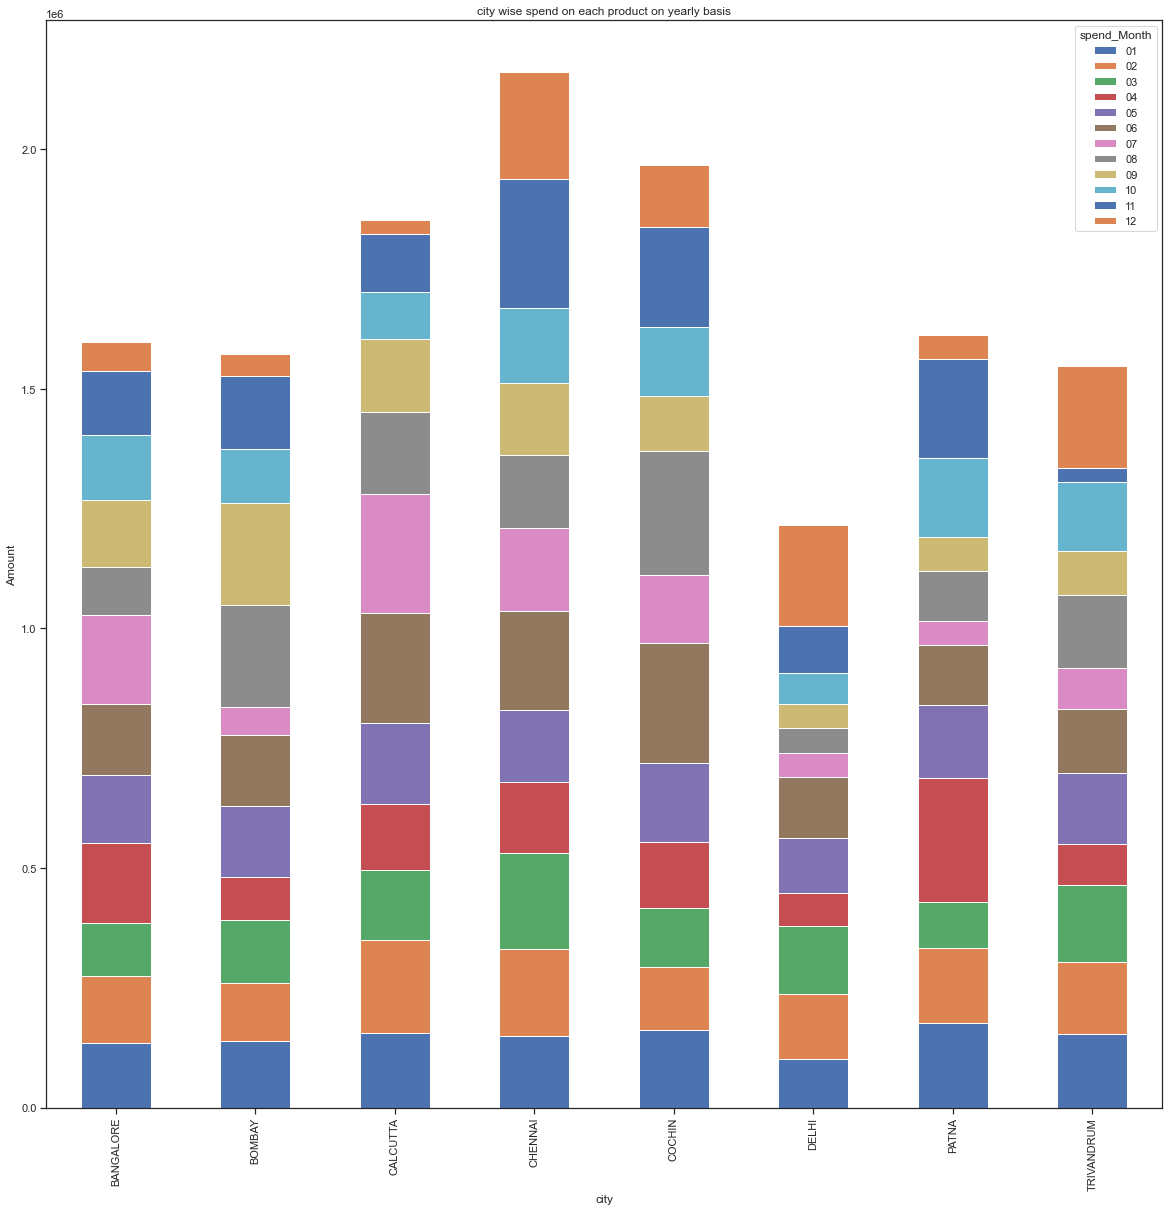

In [102]:
out2=customer_spend.pivot_table(columns=pd.to_datetime(customer_spend['spend_Month']).dt.strftime('%m'),
                           values='Amount',index='City',aggfunc='mean')
display(out2)
out2.plot(kind='bar',stacked=True,figsize=(20,20))

plt.ylabel("Amount")
plt.xlabel("city")
plt.title("city wise spend on each product on yearly basis")


 b. Comparison of yearly spend on air tickets

Type          AIR TICKET
spend_Month             
2004          4357225.35
2005         10550152.21
2006          5248469.56


Text(0.5, 1.0, 'city wise spend on each product on yearly basis')

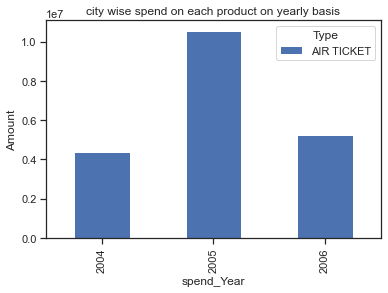

In [103]:
out1=customer_spend.pivot_table(index=pd.to_datetime(customer_spend['spend_Month']).dt.strftime('%Y'),columns='Type',values='Amount',
                           aggfunc='sum')
out2=out1.iloc[: , 0:1]
print(out2)   
out2.plot(kind='bar')

plt.ylabel("Amount")
plt.xlabel("spend_Year")
plt.title("city wise spend on each product on yearly basis")


c. Comparison of monthly spend for each product (look for any seasonality
 that exists in terms of spend)

spend_Month,01,02,03,04,05,06,07,08,09,10,11,12
Product,,,,,,,,,,,,
Gold,32413831.83,24779179.55,19256972.48,13170572.59,21548169.76,6538862.64,5167416.37,4954030.42,3816887.62,3018223.38,9203267.46,2332940.96
Platimum,14951578.51,9134054.58,7288837.68,5182493.86,8151926.49,2965712.71,1288156.26,1714762.80,1667840.84,550275.04,2741618.42,750156.19
Silver,4206383.62,2087018.37,3909405.83,1902322.65,2140940.01,689537.61,530153.72,293109.82,442803.13,100001.50,691102.63,200537.90


Text(0.5, 1.0, 'product wise spend on each product on yearly basis')

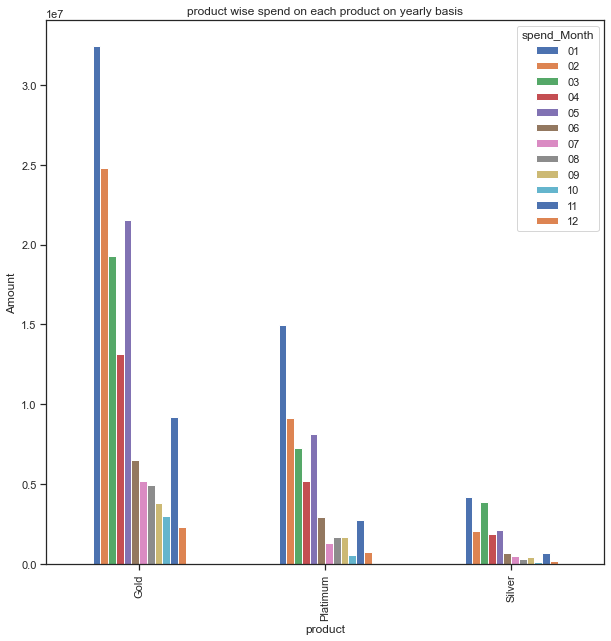

In [109]:
out2=customer_spend.pivot_table(columns=pd.to_datetime(customer_spend['spend_Month']).dt.strftime('%m'),
                           values='Amount',index='Product',aggfunc='sum')
display(out2)
out2.plot(kind='bar',figsize=(10,10))

plt.ylabel("Amount")
plt.xlabel("product")
plt.title("product wise spend on each product on yearly basis")


Product,Gold,Platimum,Silver
spend_Month,,,
01,32413831.83,14951578.51,4206383.62
02,24779179.55,9134054.58,2087018.37
03,19256972.48,7288837.68,3909405.83
04,13170572.59,5182493.86,1902322.65
05,21548169.76,8151926.49,2140940.01
06,6538862.64,2965712.71,689537.61
07,5167416.37,1288156.26,530153.72
08,4954030.42,1714762.80,293109.82
09,3816887.62,1667840.84,442803.13


Text(0.5, 1.0, 'product wise spend on each product on yearly basis')

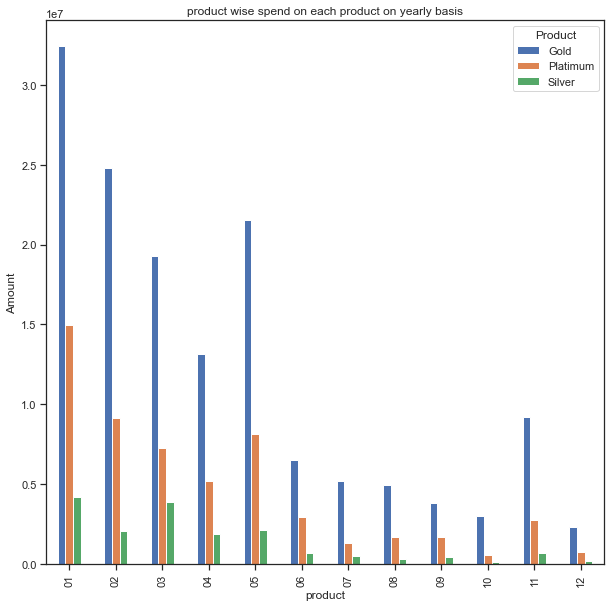

In [111]:

out2=customer_spend.pivot_table(index=pd.to_datetime(customer_spend['spend_Month']).dt.strftime('%m'),
                           values='Amount',columns='Product',aggfunc='sum')
display(out2)
out2.plot(kind='bar',figsize=(10,10))

plt.ylabel("Amount")
plt.xlabel("product")
plt.title("product wise spend on each product on yearly basis")


5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by 
different products and by different time periods i.e. year or month. The user should be able 
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
function should automatically take these inputs while identifying the top 10 customers.

Please Enter Product Category and product category should be in Gold/Silver/Platinum: gold
Please Enter Time Period and time period should be in yearly/monthly: yearly
                                       Amount
Customer City      Product yearly            
A61      COCHIN    Gold    05      4742996.79
A13      BANGALORE Gold    05      4475135.59
A14      BANGALORE Gold    05      4167917.29
A60      CALCUTTA  Gold    06      3932371.19
A12      BOMBAY    Gold    05      3905095.54
A44      DELHI     Gold    04      3870191.93
A45      COCHIN    Gold    05      3779855.44
A61      COCHIN    Gold    06      3724678.33
A42      BOMBAY    Gold    06      3716266.05
A43      BANGALORE Gold    06      3611809.51


Text(0.5, 0, 'Amount')

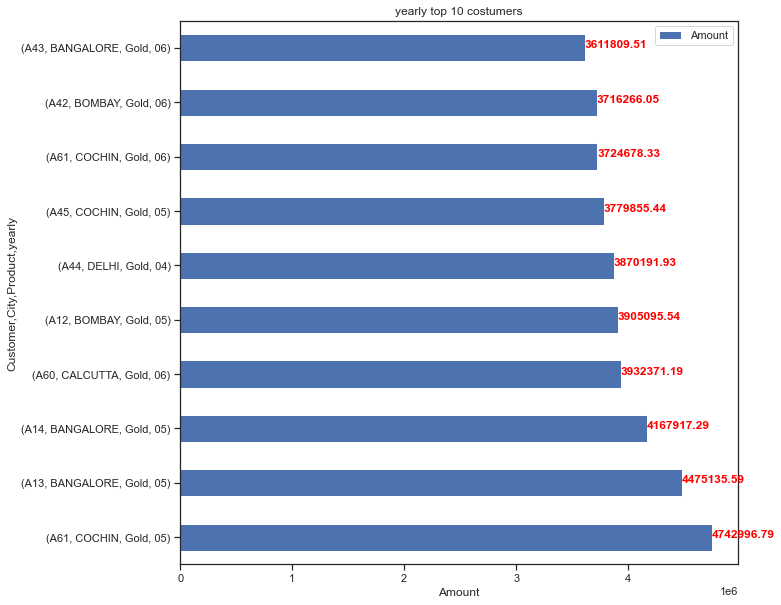

In [144]:
customer_repayment['yearly']=pd.to_datetime(customer_spend['spend_Month']).dt.strftime('%y')
customer_repayment['monthly']=pd.to_datetime(customer_spend['spend_Month']).dt.strftime('%m')

def top10Customers(product_category,time_period):
    return customer_repayment.loc[(customer_repayment.Product.str.upper() == product_category)].pivot_table(
        index=['Customer','City','Product',time_period],values='Amount',aggfunc='sum').sort_values(
        'Amount',ascending=False).head(10)


product_category=str(input("Please Enter Product Category and product category should be in Gold/Silver/Platinum: ")).upper()
time_period=str(input("Please Enter Time Period and time period should be in yearly/monthly: ")).lower()
top10Customers_Analysis=top10Customers(product_category,time_period)
print(top10Customers_Analysis)
top10Customers_Analysis.plot(kind='barh',figsize=(10,10))

for index, value in enumerate(round(top10Customers_Analysis.reset_index(),2).Amount):
    plt.text(value, index,
             str(value), color = 'red', fontweight = 'bold')
plt.title(time_period+" top 10 costumers")
plt.xlabel("Amount")
